#                              Yelp review dataset analysis

In [1]:
## Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
## Modules for Data PreProcessing and text visualization
import nltk
from collections import Counter
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import string
from textblob import TextBlob
from itertools import islice
from wordcloud import STOPWORDS
from wordcloud import WordCloud

In [3]:
## Importing necessary modelues for Model Building
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [4]:
file='/Users/ankit/Downloads/yelp_dataset/yelp_review_short.csv'

In [5]:
df= pd.read_csv(file)

In [6]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [7]:
df.describe()

,stars,useful,funny,cool
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.716700,1.29820,0.458000,0.559000
std,1.471549,2.90264,1.557973,2.056682
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,91.00000,42.000000,86.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
review_id      10000 non-null object
user_id        10000 non-null object
business_id    10000 non-null object
stars          10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
cool           10000 non-null int64
text           10000 non-null object
date           10000 non-null object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [9]:
df.dropna(inplace=True)

In [10]:
df.count()

review_id      10000
user_id        10000
business_id    10000
stars          10000
useful         10000
funny          10000
cool           10000
text           10000
date           10000
dtype: int64

In [11]:
df['length'] = df['text'].apply(len)


In [12]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


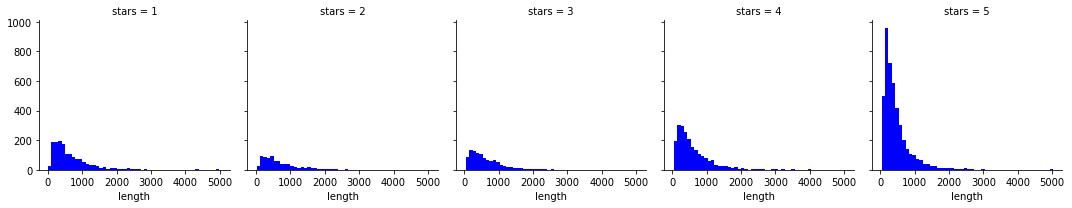

In [13]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

We can see the length of reviews was more for 5 stars.

In [14]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = df.groupby('stars').mean()
stval

,useful,funny,cool,length
stars,,,,
1,1.901897,0.576848,0.243950,711.079137
2,1.518750,0.655000,0.426250,730.323750
3,1.292523,0.514019,0.609346,681.386916
4,1.332568,0.562701,0.847037,623.055122
5,1.034132,0.316230,0.537975,470.524638


In [15]:
stval.corr()


,useful,funny,cool,length
useful,1.000000,0.711053,-0.657042,0.777206
funny,0.711053,1.000000,-0.166384,0.932967
cool,-0.657042,-0.166384,1.000000,-0.354818
length,0.777206,0.932967,-0.354818,1.000000


Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

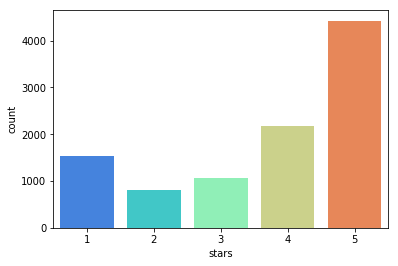

In [16]:
sns.countplot(x='stars',data=df,palette = 'rainbow')


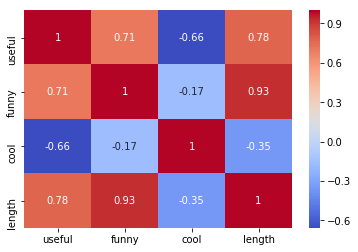

In [17]:
sns.heatmap(stval.corr(),cmap='coolwarm',annot=True)


Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.



In [18]:
yelp_class=df[(df['stars']==1)|(df['stars']==5)]
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


Set the index with review_id

In [19]:
yelp_class.set_index('review_id')

,user_id,business_id,stars,useful,funny,cool,text,date,length
review_id,,,,,,,,,
Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509
8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,380
-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,434
JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1,1,1,0,I cannot believe how things have changed in 3 ...,2012-07-16 00:37:14,968
svK3nBU7Rk8VfGorlrN52A,NJlxGtouq06hhC7sS2ECYw,YvrylyuWgbP90RgMqZQVnQ,5,0,0,0,You can't really find anything wrong with this...,2017-04-07 21:27:49,405


In [20]:
business=df.business_id.unique()

In [21]:
business.shape

(4618,)

So their are total of 4618 bussiness reviewed in the above dataset.

## Sentiment Analysis consists of two parts; Subjectivity and Polarity. Simply, Polarity and Subjectivity can be explained as follows:
Polarity — It simply means emotions expressed in a sentence, across a range of negative, to positive.
Subjectivity — Subjective sentence expresses some personal feelings, views, or beliefs.

In [22]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df_new = pd.DataFrame(columns=COLS)


In [23]:
for index, row in islice(df.iterrows(), 0, None):

    new_entry = []
    text_lower=(row['text'].lower())
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    new_entry += [row['date'],text_lower,sentiment,subjectivity,polarity]
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df_new = df_new.append(single_survey_sentimet_df, ignore_index=True)
df_new.to_csv('Yelp_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [24]:
df_new.shape

(10000, 5)

In [25]:
df_new.head()

,date,text,sentiment,subjectivity,polarity
0,2013-05-07 04:34:36,total bill for this horrible service? over $8g...,"(-0.3333333333333333, 0.6166666666666667)",0.616667,-0.333333
1,2017-01-14 21:30:33,i *adore* travis at the hard rock's new kelly ...,"(0.3158096408096408, 0.5366678366678367)",0.536668,0.315810
2,2016-11-09 20:09:03,i have to say that this office really has it t...,"(0.429125, 0.5840000000000001)",0.584000,0.429125
3,2018-01-09 20:56:38,went in for a lunch. steak sandwich was delici...,"(0.8324999999999999, 0.885)",0.885000,0.832500
4,2018-01-30 23:07:38,today was my second out of three sessions i ha...,"(0.04927662037037037, 0.43240740740740735)",0.432407,0.049277


In [26]:
df_new.describe()

,subjectivity,polarity
count,10000.000000,10000.000000
mean,0.556653,0.237336
std,0.136217,0.231866
min,0.000000,-1.000000
25%,0.479207,0.100106
50%,0.555021,0.238889
75%,0.635556,0.377350
max,1.000000,1.000000


So my program has confirmed to me that all the 10000 records are there and gave me a mean polarity of 0.24, which is good that means as an average, most people are in between neutral to positive with the services.
And as you can see the 50% Value which means the median is above zero i.e., 0.24. 

Text(0, 0.5, 'Range')

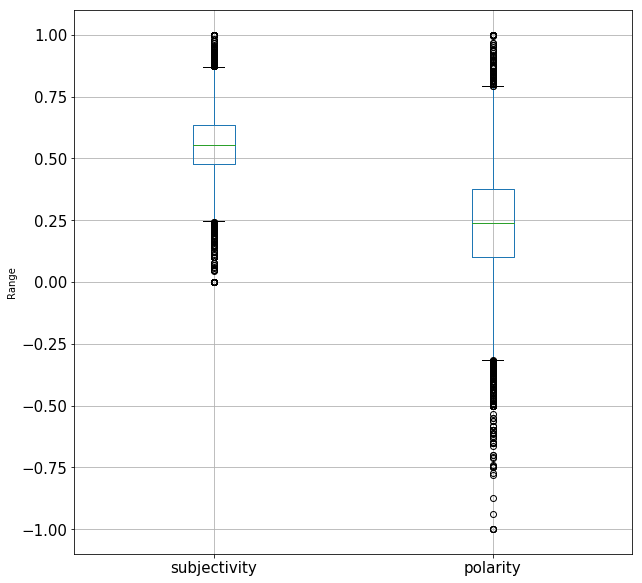

In [27]:
#boxplot for df_new

boxplot = df_new.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

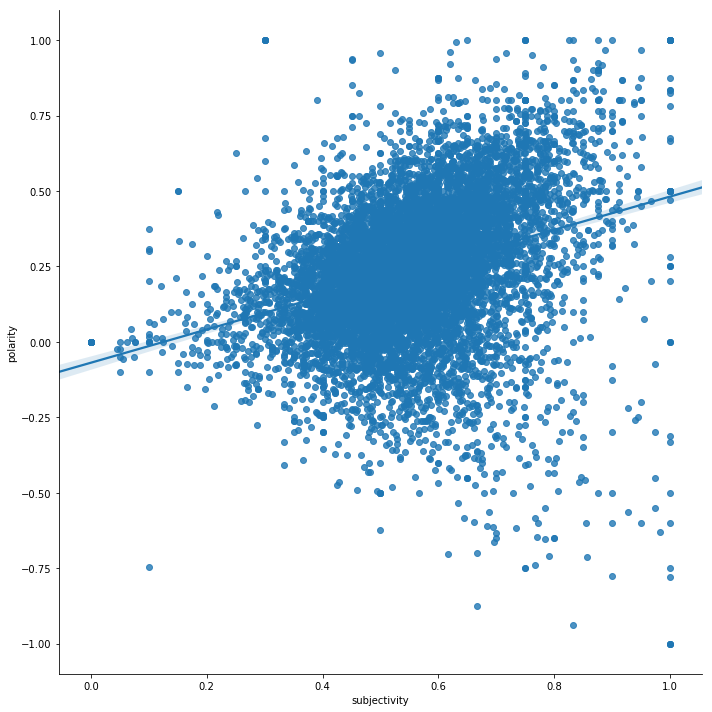

In [28]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=df_new,fit_reg=True,scatter=True, height=10,palette="mute") 


The scatter diagram is used to find the covariance and correlation between two variables. This diagram helps you determine how closely the two variables are related. After determining the correlation between the variables, you can then predict the behavior of the dependent variable based on the measure of the independent variable.

In [29]:
#covariance and correlation for df_new
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = df_new['subjectivity']
data2 = data1 + df_new['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.018555   0.02876936]
 [0.02876936 0.09274557]]
Pearsons correlation: 0.69351


The covariance between the two variables is 0.0287693. We can see that it is positive, suggesting the variables change in the same direction as we expect.

We can see that the two variables are positively correlated and that the correlation is 0.69351. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

### The plot shows a positive correlation between Subjectivity and Polarity.
Meaning, as subjectivity increase, the polarity in the response increase too, Or in other words, the more strong feelings are expressed, the more the overall comment is subjective.

In [30]:
a=df.text[0]

In [31]:
stopwords_1 = set(STOPWORDS)
stopwords_1.update(["alway","told","us","back","really","great","said","go","way","still","","Total","will","come","much","think","good", "food", "got", "get","came","even","ordered","well","place","one"])

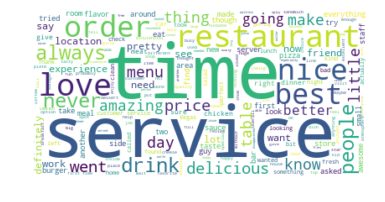

In [32]:
text1="".join(review for review in df.text)
wordcloud=WordCloud(stopwords=stopwords_1,background_color="white").generate(text=text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordcloud we can see that most common theme was Service, Timings, Table service, Drinks more than food,location and in the food section it was pizza and burger.

## Data Preprocessing

In [33]:
#remove html
def remove_html(text):
    soup= BeautifulSoup(text,'lxml')
    htmlfree= soup.gettext()
    return htmlfree

In [34]:
# remove punctuation
def remove_punctuation(text):
    no_punctuation= "".join([w for w in text if w not in string.punctuation])
    return no_punctuation

### Remove punctuation and convert to lower case

In [35]:
yelp_class['text']=yelp_class['text'].apply(lambda x: remove_punctuation(x).lower())

/Users/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
#yelp_class.text.apply(tokenize)
def remove_stopwords(text):
    text=tokenize(text)
    words= [x for x in text if x not in stopwords.words('english')]
    return " ".join(words)
remove_stopwords("i ador travi at the hard rock new kelli")

'ador travi hard rock new kelli'

In [39]:
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,total bill for this horrible service over 8gs ...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,i adore travis at the hard rocks new kelly car...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,i have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,went in for a lunch steak sandwich was delicio...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,today was my second out of three sessions i ha...,2018-01-30 23:07:38,3509


#### Now we will perform tokenization for the purpose of stemming and lemmenting

In [40]:
def tokenize(text):
    return text.split()

tokenizer= RegexpTokenizer('\w+')st
yelp_class['text']=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))

In [41]:
import re
def replace_non_english(text):
    token_words=tokenize(text)
    words=[]
    for word in token_words:
        if re.search("[^a-z]", word) is None:
            words.append(word)
    return " ".join(words)
print(replace_non_english("this is 100"))                

this is


In [42]:
# tokenizing using split
lemmatizer= WordNetLemmatizer()


In [43]:
porter= PorterStemmer()

In [44]:
def stemSentence(sentence):
    token_words=tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

In [45]:
stemSentence("horrible service")


'horribl servic'

In [46]:
def lemmatize(sentence):
    token_words=tokenize(sentence)
    tokenized_words = []
    for word in token_words:
        tokenized_words.append(lemmatizer.lemmatize(word))
    return " ".join(tokenized_words)

lemmatize("i am a dogs")

'i am a dog'

In [47]:
yelp_class.text = yelp_class.text.apply(remove_stopwords)

/Users/ankit/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [48]:
yelp_class.text = yelp_class.text.apply(replace_non_english)


In [49]:
yelp_class.text = yelp_class.text.apply(lemmatize)


In [50]:
yelp_class.text = yelp_class.text.apply(stemSentence)

In [51]:
type(yelp_class.text)

pandas.core.series.Series

In [52]:
yelp_class['text'].head()

0    total bill horribl servic crook actual nerv ch...
1    ador travi hard rock new kelli cardena salon i...
2    say offic realli togeth organ friendli dr j ph...
3    went lunch steak sandwich delici caesar salad ...
4    today second three session paid although first...
Name: text, dtype: object

In [53]:
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,total bill horribl servic crook actual nerv ch...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,ador travi hard rock new kelli cardena salon i...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,say offic realli togeth organ friendli dr j ph...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,went lunch steak sandwich delici caesar salad ...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,today second three session paid although first...,2018-01-30 23:07:38,3509


## CountVectorizer for text classification


In order to train our model we need to assign numbers to our words which are present in the reviews.Their are many ways to do this:

Bag of words: but that would be inefficient, all words have same importance, no semantic information is preserved.

Countervector: It can be used here as it counts the number of words used and the number of features depends on it. This converts our text features into numbers which helps in the model preparation.

Tfidf: Uncommon words are given more importance than the common words.

As countervector gives a discrete value of number of counts so multinomialNB should perform better for this counter.


In [54]:

# Create a series to store the labels: y
y = yelp_class.stars

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(yelp_class["text"],y,test_size=0.33,random_state=53)


In [55]:

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(max_df=0.5)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['aaa', 'aargosi', 'aaron', 'aback', 'abandon', 'abbey', 'abbi', 'abd', 'abel', 'abid']


In [56]:
cv1=CountVectorizer()
text=["The fox is the not fox","The dog","The fox"]
x_train= cv1.fit_transform(text)
x=cv1.vocabulary_
for w, y in (x.items()):
    print(w, y)
len(x)    

the 4
fox 1
is 2
not 3
dog 0


5

In [57]:
print(len(count_vectorizer.vocabulary_))

12440


In [58]:
x=count_vectorizer.vocabulary_
type(x)
x

{'kristin': 5983,
 'knowledg': 5957,
 'work': 12247,
 'satisfi': 9410,
 'servic': 9628,
 'would': 12267,
 'recommend': 8862,
 'line': 6241,
 'schedul': 9469,
 'great': 4667,
 'ye': 12336,
 'chino': 1939,
 'god': 4550,
 'chines': 1935,
 'mexico': 6787,
 'caribbean': 1646,
 'fusion': 4351,
 'answer': 404,
 'plea': 8245,
 'know': 5956,
 'love': 6386,
 'frequent': 4251,
 'sinc': 9894,
 'forev': 4170,
 'front': 4288,
 'tin': 11119,
 'delici': 2831,
 'fill': 3965,
 'brim': 1327,
 'extra': 3765,
 'snickerdoodl': 10066,
 'im': 5331,
 'sport': 10297,
 'gigant': 4484,
 'grin': 4708,
 'caus': 1726,
 'sort': 10177,
 'food': 4136,
 'euphoria': 3635,
 'what': 12105,
 'import': 5349,
 'old': 7551,
 'back': 735,
 'insid': 5478,
 'that': 10966,
 'count': 2435,
 'right': 9142,
 'greet': 4689,
 'friendli': 4270,
 'girl': 4497,
 'offer': 7509,
 'help': 5003,
 'order': 7640,
 'sever': 9655,
 'peopl': 8018,
 'smile': 10029,
 'look': 6344,
 'like': 6222,
 'enjoy': 3544,
 'bustl': 1480,
 'sunday': 10614,
 'ni

In [59]:
for y in sorted(x.values()):
    print(y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461


4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215


5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872


7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832


9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645


11085
11086
11087
11088
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11157
11158
11159
11160
11161
11162
11163
11164
11165
11166
11167
11168
11169
11170
11171
11172
11173
11174
11175
11176
11177
11178
11179
11180
11181
11182
11183
11184
11185
11186
11187
11188
11189
11190
11191
11192
11193
11194
11195
11196
11197
11198
11199
11200
11201
11202
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
1125

## TfidfVectorizer for text classification


Bernoulli NB is good for making prediction if the features are in a binary form.
Gaussian NB is good if the features are normally distributed.

As many of the common words like "are", "the" etc dominate our model hence we can use tfidf vectorizer which stands for Term frequency inverse document frequency.

Tfidf= Term Frequency* Inverse Document Frequency
where, term frequency= number of occurence of the word in the document/ number of words in the document
       inverse document frequency= log(no. of documents/no. of documents containing the words)

In [61]:
tf= TfidfVectorizer(max_df=0.5)
tf_train=tf.fit_transform(count_train)
tf_test= tf.transform(count_test)

AttributeError: lower not found

In [62]:

# Print the first 10 features
print(tf.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tf_train.A[50:5])

NotFittedError: TfidfVectorizer - Vocabulary wasn't fitted.

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [ ]:
tfidf_df = pd.DataFrame(tf_train.A, columns=tf.get_feature_names())

In [ ]:
# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


## Training and testing a classification model with scikit-learn


In [63]:

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.9318066157760814
[[ 427   79]
 [  55 1404]]


### TfidfVectorizer

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb_classifier_1 = MultinomialNB()
br_classifier = BernoulliNB()

nb_classifier_1.fit(tf_train, y_train)
gb_classifier.fit(tf_train.toarray(),y_train)
# Create the predicted tags: pred
pred_1 = nb_classifier_1.predict(tf_test)
pred_3= gb_classifier.predict(tf_test.toarray())
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred_1)
print("The accuracy score using MultinomialNB with tfidf:"+ str(score))
score_gb=metrics.accuracy_score(y_test,pred_3)
print("The accuracy score using BernoulliNB with tfidf:"+ str(score_gb))
#Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_1)
print("The confusion matrix using MultinomialNB with tfidf:")
print(cm)


We see that the accuracy reduced as tfidf reduces the unwanted features which are not important for model building.

In [ ]:
alphas = np.arange(0, 1, .1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tf_train, y_train)
    pred = nb_classifier.predict(tf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf',TfidfVectorizer()),
                     ('sgd',SGDClassifier())])
params = {'tfidf__use_idf':(False,True)}
gridsearch = GridSearchCV(pipeline,params)
gridsearch.fit(X_train,y_train)
print(gridsearch.best_params_)

## We got the best accuracy at alpha=0.1

### N gram Vectorization

N grams are continous sequences of n-items in a sentence. N can be 1,2, or any positive number. Using this medthod the model can store more context.

In [ ]:
#bigrams
cv_n = CountVectorizer(ngram_range=(1,2)) # (1,2) will use both 1 and 2 

In [ ]:
# Transform the training data using only the 'text' column values: count_train 
bigram_train = cv_n.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
bigram_test = cv_n.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(cv_n.get_feature_names()[:10])

In [ ]:
bigram_df = pd.DataFrame(bigram_train.A, columns=cv_n.get_feature_names())
print(bigram_df.head())

In [ ]:
nb_classifier_2= MultinomialNB(alpha=0.1)
nb_classifier_2.fit(bigram_train, y_train)

# Create the predicted tags: pred
pred_2 = nb_classifier_2.predict(bigram_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred_2)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_2)
print(cm)


In [ ]:
print(nb_classifier_2.predict(cv_n("I loved the food")))

The accuracy using bigrams comes to 94.7%

### Word embedding

Word embedding is a language modelling technique used for mapping words to vectors . Like one food gets related to other food items.

It uses the idea of context, which means vectors of completely unrelated words should be far from other. 
Like, difference between vectors for male and female should be closer to difference between male employeeand female employee in a firm.

Word2vec(model made by google), 
Co-occurence matrix(decomposition of large marix into smaller ones- glove method(log of co-occurence matrix))

It preserves syntactical meaning of the text. 
Every word has a vector, we assign one hot vector initially where only one bit in a vector is 1. Then we take a window size and iterate hroughout our document. When we do this 2 words come into picture:
CBOW and Skipgram

In [ ]:
!pip install --upgrade gensim



In [ ]:
import gensim
import gensim.models.word2vec as w2v


In [ ]:

import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [ ]:
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging

seed = 1
reviews2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)
reviews2vec.build_vocab(yelp_class['text'].apply(lambda x :tokenizer.tokenize(x)))
print("Word2Vec vocabulary length:", len(reviews2vec.wv.vocab))

In [ ]:
import sklearn.manifold


In [ ]:
sentences=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))
#total_example=reviews2vec.wv.vocab
reviews2vec.train(sentences,epochs=10,total_examples=reviews2vec.corpus_count)

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = reviews2vec.wv.syn0

all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [ ]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[reviews2vec.wv.vocab[word].index])
            for word in reviews2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"])

In [ ]:
points.head(10)


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.datasets import cifar10

X=yelp_class.text
y=yelp_class.stars

from tensorflow.keras.datasets import cifar10



model=Sequential()
model.add(Conv2D())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model=Sequential()
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))# added additional activation function as compared to the previous model

import numpy as np

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


TypeError: __init__() missing 2 required positional arguments: 'filters' and 'kernel_size'

In [ ]:
model.fit(X_train, y, batch_size=32, epochs=5, validation_split=0.3,callbacks=[tensorboard])
